<a href="https://colab.research.google.com/github/bishwakarma/resume-project/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN: K-Nearest Neighbours             

# Objectives

1. Exmpain the difference between Parametric and Non-Parametric Models.
2. Explore the IRIS Dataset.
3. Implement the KNN Algorithm from scratch. 
4. Compare the result with sklearn library. 
5. Perform Hyperparameter Training usng the Cross-Validation.
6. Show the decision boundary using animation. 
7. Discuss the choice of distance ( Manhattan vs. Euclidean).
8. Discuss the importance of Feature Scaling. 
9. Explain the KNN Search Space and the curse of Dimensionality. 
10. Discuss some of the Use Case of KNN and how it is used widely. 
11. Summarize KNN pros and cons. 


##  The difference between Parametric and Non-Parametric Models

1. Parametric Model:
    - Using Parametric Model, I'll know which model exactly I will fit to the Data. For e.g., Linear Regression Line. 
        - y = WX + e, where,W is a parameter.
    
        - Here, the Regression will look like a linear line.
        
    
2. Non-Parametric Model (NP):
    - NP Model will help analyze the Data to explain what the **Regression** will look like.
    
        - y = f(x) + e, where f(x) can be any mathematical function. Therefore, applying N-P Model, the data will 
            decide what the function 'f' looks like. 
        - f(x) can be perfectly approximated by an infinite-parameter model (as many parameter models), which is
            parametric.
        - The number of parameters are decided by the Data itself. 
        - If we change the parameters, the Data will be different. 

## Needed Libraries for this Project. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

## %matplotlib inline

## EDA ON IRIS DATASET

(This is a Classification Dataset problem)

### Attributes:
    1- Sepal Length in cm
    2- Sepal Width in cm
    3- Petal Length in cm
    4- Petal Width in cm
For easier visualization I am just going to use TWO features; Sepal Length and Width.

### Class / Label:
    1- Iris Setosa
    2- iris Versicolour
    3- Iris Vurginica
    
#### NOTE: sklearn contains many datasets in its server. Iris Dataset is built into the sklearn server. To load the Iris dataset I am using a dataset() fuction. This kind of dataset is also called Toy-Datasets. 

Reference Link: 
https://scikit-learn.org/stable/datasets.html

In [ ]:
# load Iris Dataset
iris = datasets.load_iris()

In [ ]:
# using np.c_ a numpy concatenate function to concatenate feature_names and target variable from Data and Target. 
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], 
                       columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Dataset Description

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Data split into X and y.
In a Supervised Machine Learning we need to split a data into X and y.

- iloc = Index location

          : implies all the rows
          :-1 implies all Rows Minus the Last Column. Which is the Target/Labelled Variable. 
          -1 implies include the last column.
                  
- X is a Dataframe 
- Y is a Series

In [ ]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# as we have only Target column. 
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Split into Training and Testing. 

- Training ML with data without shuffline will lead to biased result as most of teh data groups might be of similar dataset. Therefore, shuffle = True. 
- NOTE: In the TimeSeries scenario the Data cannot be shuffled because, each Row/Instance in the Dataset represents a Time Instance. 

- Random_state = 0 to get the same shullfe whe we reuse the dataset.
- Parameters within the train_test_split() are Inputs. 
- X_train, X_test, y_train, y_test are the Outputs.

- With the help of the np.asarray() function I converted the pandas dataframe Outputs into the Numpy arrays. The process is called Type Casting. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   random_state = 0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
print (f"training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples")

training set size: 120 samples 
test set size: 30 samples


## Normalizing the Dataset
Normalization is from 0 to 1

In [ ]:
scaler = Normalizer().fit(X_train) # Fitting scaler into the Training set X_train.
normalized_X_train =  scaler.transform(X_train) # applying scaler to the Training Set.
normalized_X_test = scaler.transform(X_test) # applying scaler to the testing set.

In [ ]:
print("X_train before Normalization")
print(X_train[0:5])
print("\nX_train after Normalization")
print(normalized_X_train[0:5])

X_train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]

X_train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


### Dataset visualization Before and  After the Normalization.

Pair Plot is the plotting for the features and other features. 

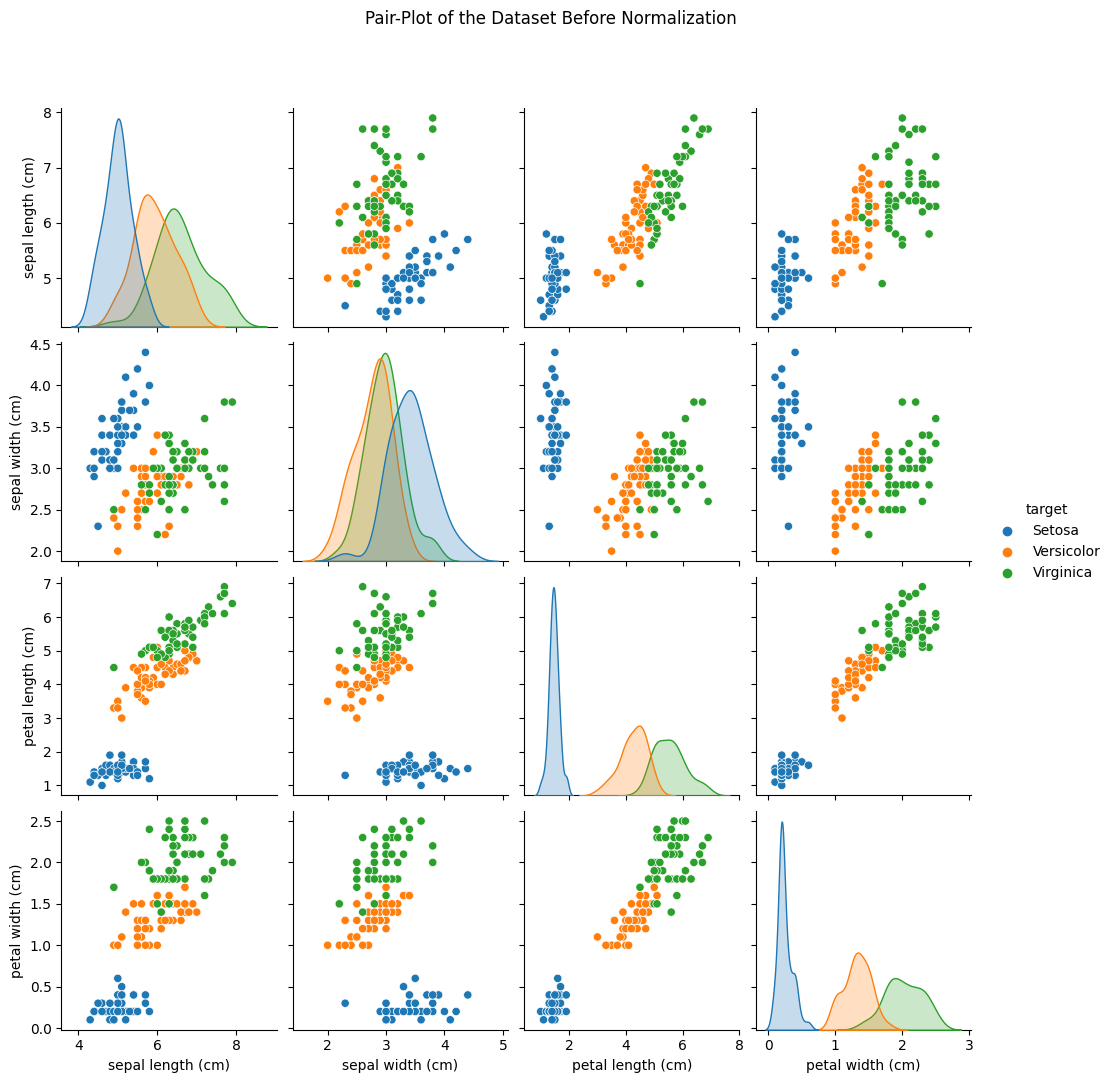

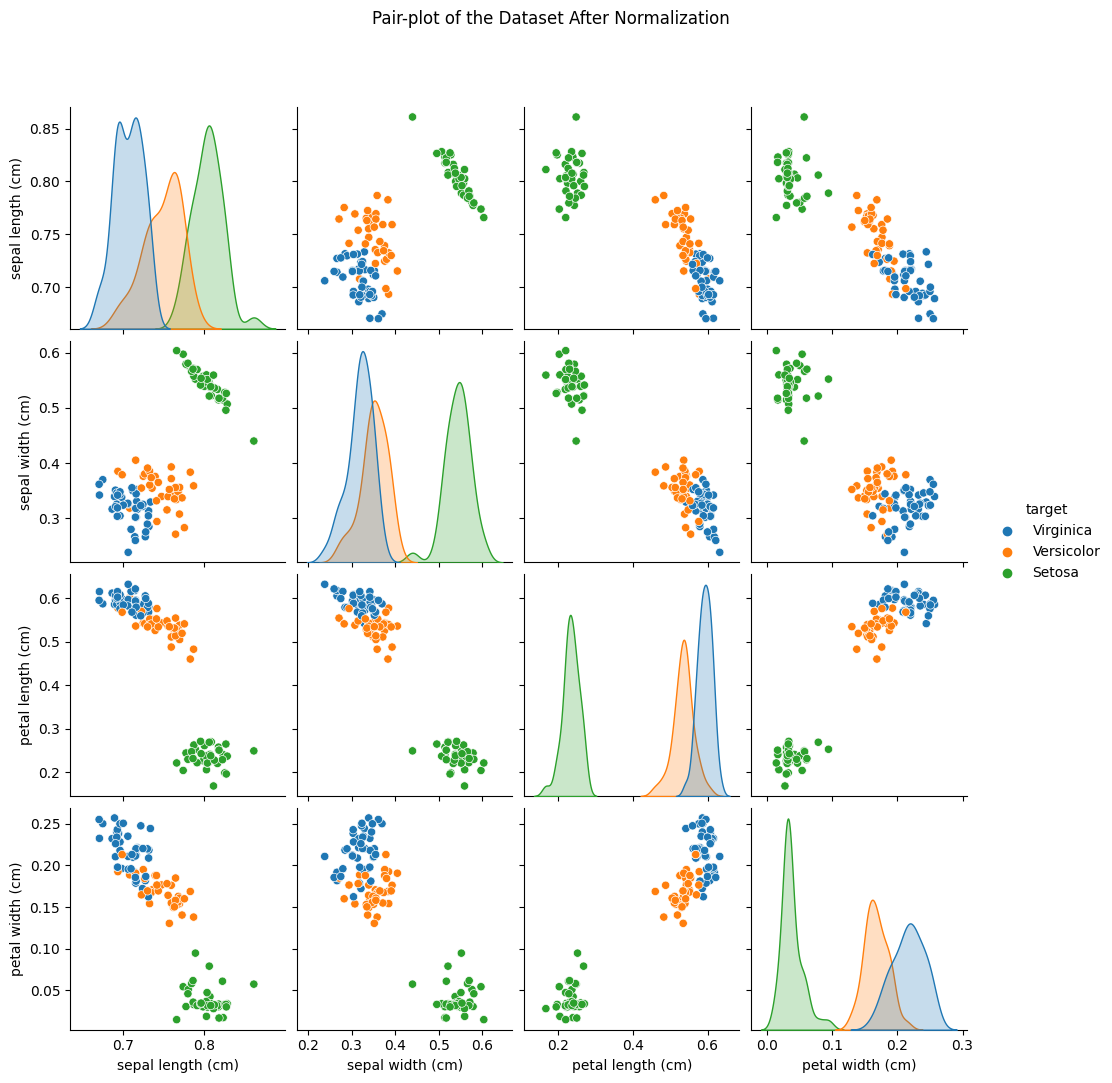

In [ ]:
## Before

## View of relationships between variables; color code by species type. di = dictionary for 0.0, 1.0, 2.0 targets.
di = {0.0: "Setosa", 1.0: "Versicolor", 2.0: "Virginica"}

# Pairplot before Normalization
before = sns.pairplot(iris_df.replace({"target": di}), hue='target')
before.fig.suptitle("Pair-Plot of the Dataset Before Normalization", y=1.08)

## After
# Pairplot after Normalization
iris_df_2 = pd.DataFrame(data = np.c_[normalized_X_train, y_train],
                        columns= iris["feature_names"] + ['target'])

di = {0.0: "Setosa", 1.0: "Versicolor", 2.0: "Virginica"}

after = sns.pairplot(iris_df_2.replace({"target": di}), hue = 'target')
after.fig.suptitle("Pair-plot of the Dataset After Normalization", y=1.08)
plt.show()

Afer Normalization the Distribution of Data is much better. 
The Setosa Class now appears in a higher accuracy to others for sepal Length and Width than before Normalization. 

# Implement KNN

### KNN Visually
http://localhost:8888/view/Desktop/pythonPractice/studyPythonML/ReviewPrep/images/knnVisually.png

### KNN Algorithm Steps

1. Calculate the distance between all the training data and the test point. 

2. Find the nearest K neighbors by sorting these pairwise distances. For example, if K = 3, we calculate 3 nearest neighbors. 

3. Classify the point based on a majority vote. 

It is a non-parametric model, based on the data itself.

## Implementing KNN Algorithm from scratch.

### KNN Step 1: Calculate the distance using the Eculidean Distance. 

- The Euclidean distance formula, as its name suggests, gives the distance between two points (or) the straight line distance. 
- Let us assume that (x1,y1) and (x2,y2) are two points in a two-dimensional plane. Here is the Euclidean distance formula.
- The Euclidean distance formula says:

d = √ [(x2-x1)^2 + (y2-y1)^2)]

where,

    (x1, y1) are the coordinates of one point.
    (x2, y2) are the coordinates of the other point.
    d is the distance between (x1, y1) and (x2, y2).
Reference: 
https://www.cuemath.com/euclidean-distance-formula/

In [ ]:
def ecu_distance(x_train, x_test_point):
    """
    Input:
        - x_train : Corresponding to the training data.
        - x_test_point: Corresponding to the test point.
        
    Output:
        - distances: The distance between the test point and each point in the training data. 
    """
    # Empty list
    distances = []
    # Loop over the number of rows len(x_train) in the training data. [0-190]
    for row in range(len(x_train)):
    # Get them point by point for each iteration of the current row over each iteration and assign to the variable.
        current_train_point = x_train[row]
    # Initialize the current distance by 0 because we can have more than 1 distance.
    # We canculate the distance over each features/columns. 4 features in Iris Dataset. 
        current_distance = 0
        
    # Add all the distances together. 
    # Loop over the columns of the row.
        for columns in range(len(current_train_point)):
        
            current_distance += (current_train_point[columns] - x_test_point[columns])**2
        current_distance = np.sqrt(current_distance)
        
        # Append the distances to the distances list. 
        distances.append(current_distance)
        
     # Store the distances in the Dataframe for further implementation.
    distances = pd.DataFrame(data = distances, columns=['dist'])
    return distances

### KNN Step 2 ( Find the nearest neighbors )

In [ ]:
def nearest_neighbors(distance_point, K):
    
        """
        Input: 
            - distance_point: The distance between the test point and each point in the training data.
            - K:              The Number of neighbors.
            
        Output:
            - df_nearest: The nearest K neighbors between the test point and the training data.
        """
        
    # Sorting distances using sort_values function. dist is the name of the column.
        df_nearest = distance_point.sort_values(by=['dist'], axis = 0) 
    ## Taking only teh first few neighbors. From 0 to K.
        df_nearest = df_nearest[:K]
        return df_nearest    

### KNN Step 3 ( Classify the point based on a majority vote )

In [ ]:
def voting(df_nearest, y_train):
    """
    Input: 
        - df_nearest: Dataframe contains the nearest K neoghbors between the Full training dataset 
            and the test point.
        - y_train: The labels of the training dataset. 
        
    Output:
        - y_prediction: The prediction based on majority voting.
    """
    
    ## Using the Counter Object to get the label's with the K-Nearest neighbors.
    counter_vote = Counter(y_train[df_nearest.index])
    
    ## Majority Voting.
    y_prediction = counter_vote.most_common()[0][0]
    
    return y_prediction
    

## KNN Algorithm: putting everything together.

In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):
    
    """
    Input:
        - x_train: The full training dataset.
        - y_train: the labels of the training dataset.
        - x_test: The full test dataset.
        - K: The number of neighbors.
    
    Output:
        - y_prediction: The prediction of the whole test set based on the majority voting. 
    """
    
    y_prediction = []
    
    ## Loop over all test data and iterate over point by point to perform the 3 steps. 
    for x_test_point in x_test:
        distance_point = ecu_distance(x_train, x_test_point) ## Step 1
        df_nearest_point = nearest_neighbors(distance_point, K) ## Step 2
        y_prediction_point = voting(df_nearest_point, y_train) ## Step 3
        y_prediction.append(y_prediction_point)
    
    return y_prediction

## Testing the KNN Algorithm on the Iris Dataset. 

In [ ]:
K = 3
y_prediction_scratch = KNN_from_scratch(normalized_X_train, y_train, normalized_X_test, K)
print(y_prediction_scratch)

## Following are the test points.

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


# Comparing KNN Implementation with Sklearn Library.

In [ ]:
# k-nearest classifier object
knn = KNeighborsClassifier(K)
knn.fit(normalized_X_train, y_train)

# Classify x_test to get labels for testing dataset.
y_prediction_sklearn = knn.predict(normalized_X_test)

# labels for testing dataset
print(y_prediction_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


## Checking is the output is exactly the same. 

In [ ]:
print(np.array_equal(y_prediction_sklearn, y_prediction_scratch))

## The outaputs from sklearn and my implitation from y_prediction_scratch is equal. Hence True.

True


## Calculate the accuracy of both models. 

In [ ]:
print(f'The accuracy of the SKLEARN Implimentation is {accuracy_score(y_test, y_prediction_sklearn)}')
print(f'The accuracy of the MY Implimentation is {accuracy_score(y_test, y_prediction_sklearn)}')

The accuracy of the SKLEARN Implimentation is 0.9666666666666667
The accuracy of the MY Implimentation is 0.9666666666666667


# Hyperparameter Using the K-Fold Cross Validation.

1. We should **Never** tune the Hyper-Parameters using the Test Data, because the ultimate goal of any ML 
    Algorithm is to perform well on Unseen Data. The fact that you are changing the Hyper-Parameters of the 
    Algorithm based on how well it performed on the Test Set contradicts this idea. Because we are trying to change
    the hyper-Parameters based on how well it performed in the Test Data set.  

2. Thus, we need another dataset to "Validate", "Experiment" or "Tune" the hyper-Parameters on.

3. The basic idea is to split the Dataset into Three separate sets.
    - 1. Training
    - 2. Validation
    - 1. Testing
    
   With 60/20/20 Splits for example.
   
   Consider the Validation set as your Testing Set while Tuning the Model. Then after finding the best values, we
   test on the Test Set, but Never tune based on it. 
   
4. **Cross-Validation** is when the Dataset is Randomly split up into 'k' groups. One of the groups is used as the
    Test Set and the rest are used as the Training Set. 

5. The Model is trained on the Training Set and scored on the Test set. Then the process is repeated until each 
    unique group has been used as the Test Set.

6. This method better than Train / Validate / Test, because we are not wasting any data. 
    


In [ ]:
## 4 is the number of splits. 
n_splits = 4

## Calling K-Fold.
k_fold = KFold(n_splits = n_splits)

## Tracking accuracy foe each K. 
accuracy_k = []

In [ ]:
## Search for the best value of k.
k_values = list(range(1,30,2))

## Loop over the K Values
for k in k_values:
    accuracy_fold = 0
    
    ## Loop over the splits
    ## Retrive indices for normalized X_Train and X_Valid fold for 4 splits. 
    for normalized_X_train_fold_index, normalized_X_valid_fold_index in k_fold.split(normalized_X_train):
        
        ## Fetch the values
        normalized_X_train_fold = normalized_X_train[normalized_X_train_fold_index]
        y_train_fold = y_train[normalized_X_train_fold_index]
        
        normalized_X_test_fold = normalized_X_train[normalized_X_valid_fold_index]
        y_valid_fold = y_train[normalized_X_valid_fold_index]
        
        y_prediction_fold = KNN_from_scratch(normalized_X_train_fold, y_train_fold, normalized_X_test_fold, k)
        
        ## accuracy accumulation.
        accuracy_fold += accuracy_score(y_prediction_fold, y_valid_fold)
    accuracy_fold = accuracy_fold / n_splits
    accuracy_k.append(accuracy_fold)

In [ ]:
print(f"The accuracy for each K-Value was \n{ list (zip(accuracy_k, k_values))}")
print(" ")
print(f"Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K = {k_values[np.argmax(accuracy_k)]}")

The accuracy for each K-Value was 
[(0.9666666666666668, 1), (0.9666666666666668, 3), (0.9666666666666668, 5), (0.9666666666666668, 7), (0.9583333333333333, 9), (0.9583333333333333, 11), (0.9583333333333334, 13), (0.95, 15), (0.9583333333333333, 17), (0.9583333333333333, 19), (0.9583333333333333, 21), (0.9583333333333333, 23), (0.9583333333333333, 25), (0.9583333333333333, 27), (0.9583333333333333, 29)]
 
Best accuracy was 0.9666666666666668, which corresponds to a value of K = 1
